# Precipitation and Flow Rate Data at San Diego

In [1]:
import pandas as pd
import requests as req
import matplotlib.pyplot as plt

### Precipitation Data

Precipitation information downloaded from CDEC: [Precipitation](https://cdec.water.ca.gov/dynamicapp/QueryDaily?s=SDG&end=2018-06-18&span=365days)
<br>
Measured at Lindbergh Airport
<br>
CDEC Station ID: SDG

In [2]:
raw_ppt_df = pd.read_csv('data/CDEC-SDG-Precipitation.csv', comment = '#', header = 0)

In [3]:
# Get new dataframe with unnecessary information removed & rename columns.
ppt_df = raw_ppt_df[['Date / Time(PST)', 'PPT INCINCHES']].copy()
ppt_df.columns = ['datetime', 'ppt']

In [4]:
ppt_df['datetime'] = pd.to_datetime(ppt_df['datetime'])
ppt_df['ppt']      = pd.to_numeric(ppt_df['ppt'], errors = 'coerce')

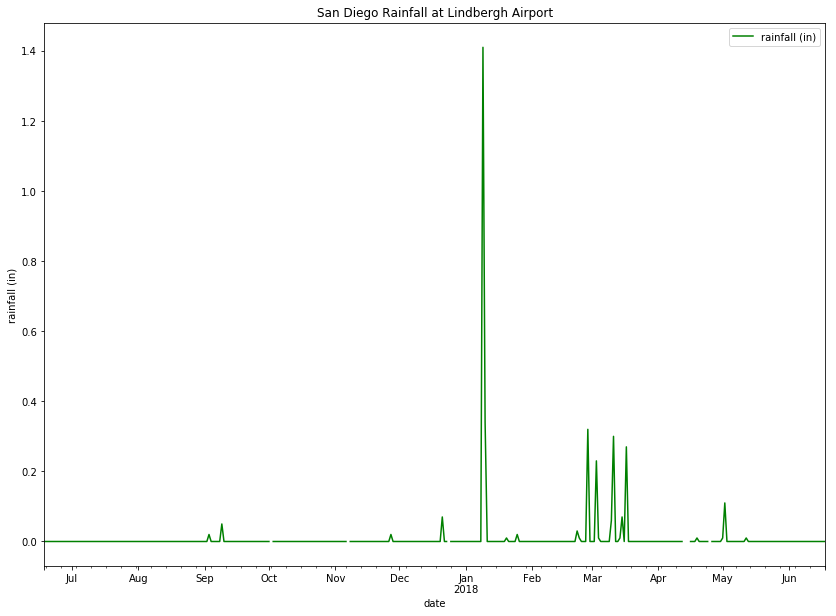

In [5]:
ax = ppt_df.plot(x='datetime',
                 y='ppt',
                 figsize = (14, 10),
                 title = 'San Diego Rainfall at Lindbergh Airport',
                 color = 'green')
ax.set_xlabel("date")
ax.set_ylabel("rainfall (in)")
ax.legend(["rainfall (in)"])

plt.show()

### Flow Rate

River flow information downloaded from USGS: [Flow Rate](https://waterdata.usgs.gov/ca/nwis/uv/?site_no=11023000&PARAmeter_cd=00065,00060)
<br>
San Diego River measured at Fashion Valley.
<br>
USGS station ID:11023000

In [6]:
raw_cfs_df = pd.read_csv('data/USGS-Fashion-Valley-Flow-Rate.csv', comment = '#', header = 1)

In [7]:
# Get new dataframe with unnecessary information removed & rename columns.
cfs_df = raw_cfs_df[['datetime', '14023_00060']].copy()
cfs_df.columns = ['datetime', 'cfs']

# Remove the first row after header. This row is description of data formatting.
# The relevant data starts after the data formatting description row
cfs_df.drop(cfs_df.index[:1], inplace = True)

In [8]:
cfs_df['datetime'] = pd.to_datetime(cfs_df['datetime'])
cfs_df['cfs']      = pd.to_numeric(cfs_df['cfs'], errors = 'coerce')

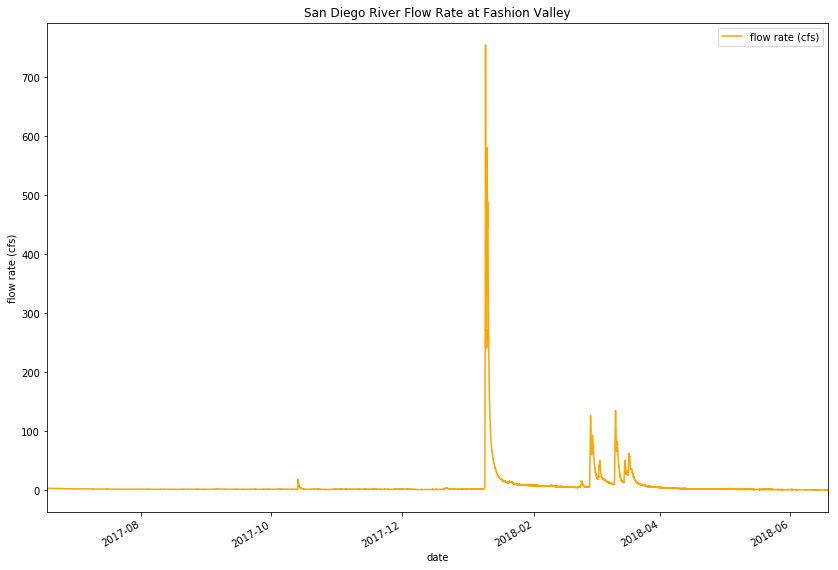

In [9]:
ax = cfs_df.plot(x='datetime',
                 y='cfs',
                 figsize = (14, 10),
                 title = 'San Diego River Flow Rate at Fashion Valley',
                 color = 'orange')
ax.set_xlabel("date")
ax.set_ylabel("flow rate (cfs)")
ax.legend(["flow rate (cfs)"])

plt.show()

### Combined graph of precipitation and flow rate

In [10]:
combined_df = pd.concat(
    [
        ppt_df.set_index('datetime'),
        cfs_df.set_index('datetime').resample('1D').mean()
    ],
    axis=1
)

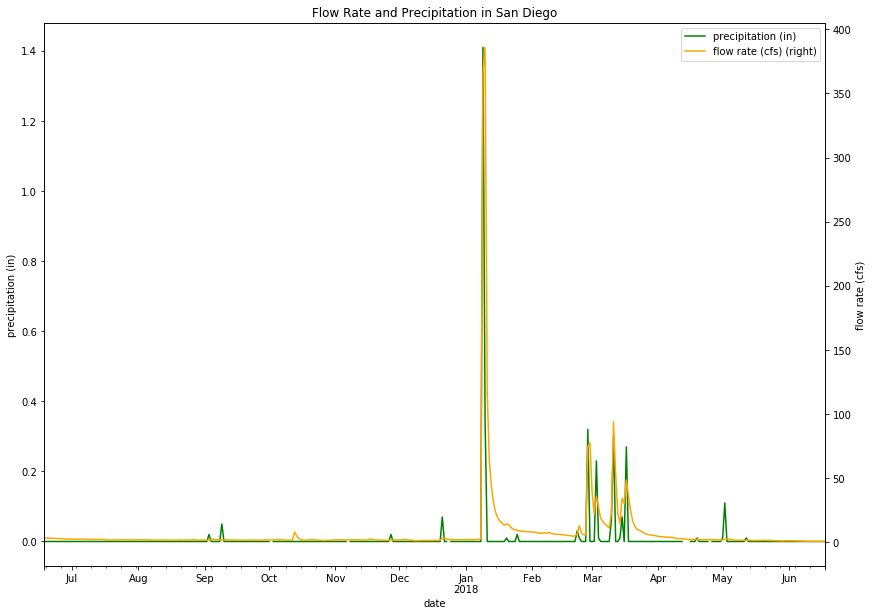

In [11]:
ax1 = combined_df.ppt.plot(label = 'precipitation (in)',
                           legend = ['precipitation (in)'],
                           color = 'green')
ax2 = combined_df.cfs.plot(secondary_y=True,
                           figsize = (14, 10),
                           label = 'flow rate (cfs)',
                           legend = ['flow rate (cfs)'],
                           title = 'Flow Rate and Precipitation in San Diego',
                           color = 'orange')
ax1.set_xlabel('date')
ax1.set_ylabel('precipitation (in)')
ax2.set_ylabel('flow rate (cfs)')

plt.show()